In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [130]:
df = pd.read_csv('train (1).csv')

In [131]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Understanding

In [132]:
df.shape

(550068, 12)

In [133]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [135]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Visualization

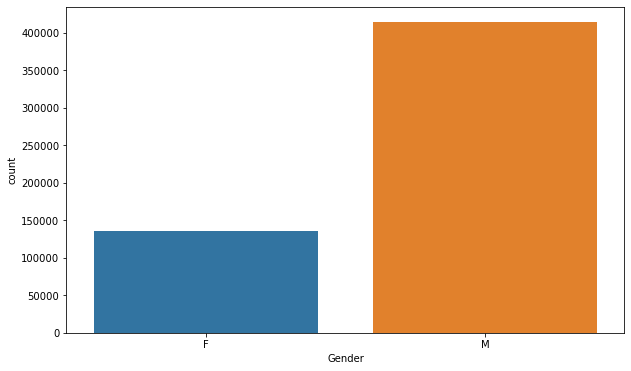

In [136]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender')
plt.show()

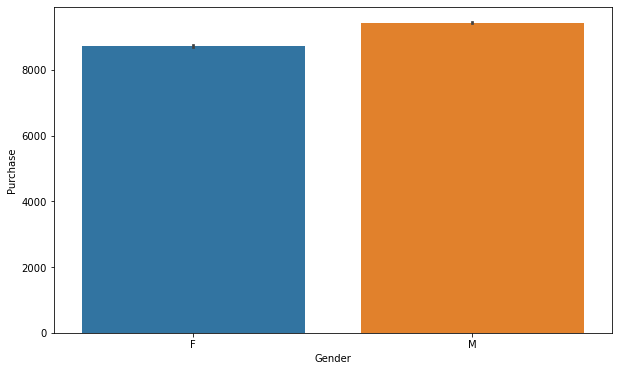

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='Purchase', data=df)
plt.show()

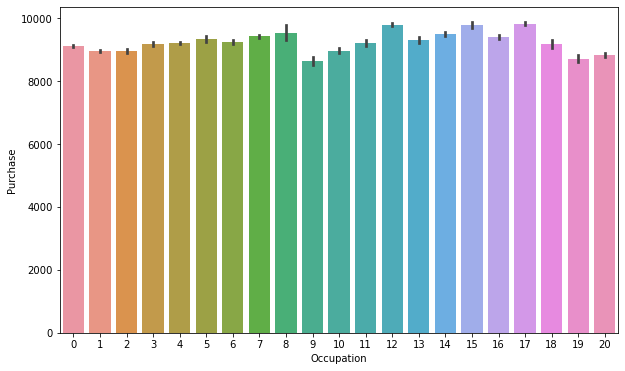

In [138]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase', data=df)
plt.show()

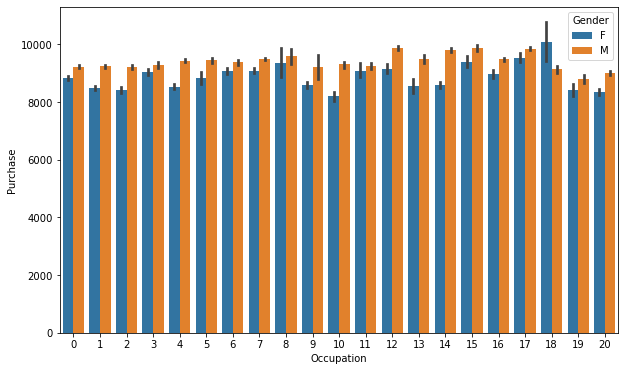

In [139]:
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Purchase',hue='Gender', data=df)
plt.show()

# Outlier Detection

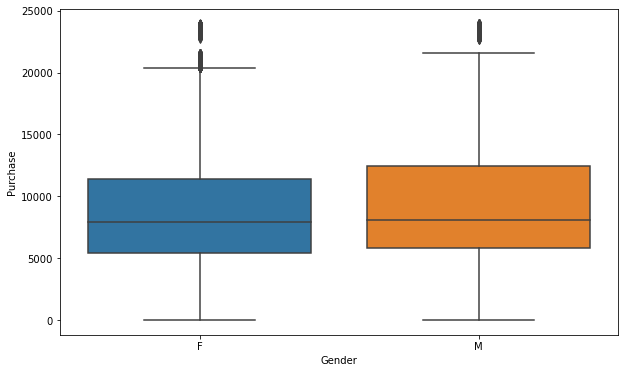

In [140]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.show()

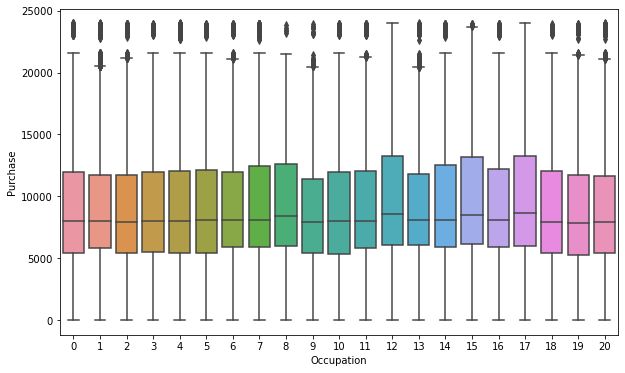

In [141]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Occupation', y='Purchase', data=df)
plt.show()

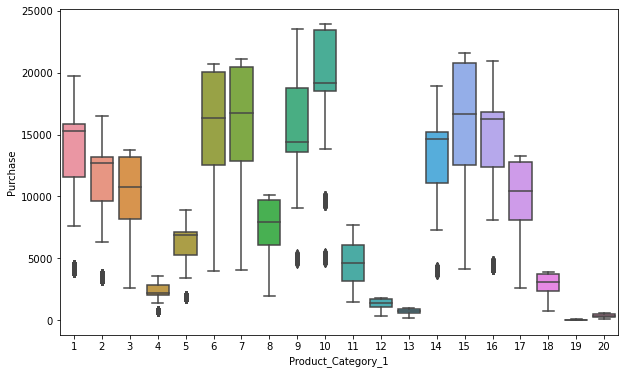

In [142]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Product_Category_1', y='Purchase', data=df)
plt.show()

# Data Preprocessing 

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
df['Product_ID'] = df['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1,1))

In [145]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(0, inplace=True)

In [146]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [147]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            550068
Purchase                           0
dtype: int64

## Maping Redundant Columns

In [148]:
map_userid = df['User_ID'].value_counts()/len(df['User_ID'])
df['User_ID'] = df['User_ID'].map(map_userid)

## Label Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
cat_col = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()
for i in cat_col:
    df[i]= le.fit_transform(df[i])
df.dtypes

User_ID                       float64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3             object
Purchase                        int64
dtype: object

In [151]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [152]:
df['Gender'] = df['Gender'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [153]:
df['City_Category'] = df['City_Category'].astype('category')

In [154]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0.000064,-1.028774,0,0,10,0,2,0,3,9.842329,None,8370
1,0.000064,0.722139,0,0,10,0,2,0,1,6.000000,None,15200
2,0.000064,-0.845799,0,0,10,0,2,0,12,9.842329,None,1422
3,0.000064,-0.869157,0,0,10,0,2,0,12,14.000000,None,1057
4,0.000140,1.077382,1,6,16,2,4,0,8,9.842329,None,7969


## Log Transformation

In [155]:
df = pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,0.000064,-1.028774,0,0,10,2,0,3,9.842329,8370,1,0,0
1,0.000064,0.722139,0,0,10,2,0,1,6.000000,15200,1,0,0
2,0.000064,-0.845799,0,0,10,2,0,12,9.842329,1422,1,0,0
3,0.000064,-0.869157,0,0,10,2,0,12,14.000000,1057,1,0,0
4,0.000140,1.077382,1,6,16,4,0,8,9.842329,7969,0,0,1


# Train Test Split

In [156]:
X = df.drop('Purchase', axis=1)
y = df['Purchase']

In [159]:
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,0.000064,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,0.000064,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,0.000064,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,0.000064,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,0.000140,1.077382,1,6,16,4,0,8,9.842329,0,0,1


In [160]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [161]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [162]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((440054, 12), (110014, 12), (440054,), (110014,))

## Scaling the Data

In [163]:
scaled = StandardScaler()
x_train = scaled.fit_transform(x_train)
x_test = scaled.transform(x_test)

# Machine Learning

## Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [165]:
y_predict = model.predict(x_test)

In [166]:
print(y_predict)

[11888.35647851  7413.11191425  9865.85647851 ... 11898.23691425
 12056.23691425  9599.98691425]


In [167]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
print('r2 score: ', score)
print('mean absolute error: ', mae)
print('mean squared error: ', mse)
print('root mean squared error: ', rmse)

r2 score:  0.1381164094839873
mean absolute error:  3579.452564131376
mean squared error:  21764329.957887523
root mean squared error:  4665.225606322541


#### The RMSE is high the model is not very accurate to predict the purchases or target column

## Decision Tree Regressor

In [168]:
DT = DecisionTreeRegressor(max_depth=9)
DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [169]:
train_preds = DT.predict(x_train)
test_preds = DT.predict(x_test)

In [170]:
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_preds)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_preds)))

print('RMSE TrainingData= ', str(RMSE_train))
print('RMSE TestData= ', str(RMSE_test))

print('RSquared value on train: ', DT.score(x_train, y_train))
print('RSquared value on test: ', DT.score(x_test, y_test))

RMSE TrainingData=  2836.340997850526
RMSE TestData=  2849.568063170483
RSquared value on train:  0.6810885189321458
RSquared value on test:  0.6784404736329694


#### Decision Tree Regressor is better than the Linear Regressor as RMSE is less as compared to linear and R Squared value is higher in this model

## Random Forest Regressor

In [171]:
RF = RandomForestRegressor().fit(x_train, y_train)

In [172]:
train_preds1 = RF.predict(x_train)
test_preds1 = RF.predict(x_test)

In [173]:
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_preds1)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_preds1)))

print('RMSE TrainingData= ', str(RMSE_train))
print('RMSE TestData= ', str(RMSE_test))

print('RSquared value on train: ', RF.score(x_train, y_train))
print('RSquared value on test: ', RF.score(x_test, y_test))

RMSE TrainingData=  1024.0212236747363
RMSE TestData=  2719.4803616899403
RSquared value on train:  0.9584308460832204
RSquared value on test:  0.7071298128326535


#### Random Forest Regressor is better than the Decision Tree as RMSE is less as compared to DT and R Squared value is higher in this model

# Importing test data

In [174]:
df_test = pd.read_csv('test (1).csv')

In [175]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Data Preprocessing of Test data 

In [176]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_test['Product_ID'] = ss.fit_transform(df_test['Product_ID'].values.reshape(-1,1))

In [177]:
df_test['Product_Category_3'] = df_test['Product_Category_3'].fillna(0, inplace=True)

In [178]:
df_test['Product_Category_2'] = df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [179]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            233599
dtype: int64

## Label Encoding of test data

In [180]:
cat_col = ['Gender', 'City_Category', 'Age']
le = LabelEncoder()
for i in cat_col:
    df_test[i]= le.fit_transform(df_test[i])
df_test.dtypes

User_ID                         int64
Product_ID                    float64
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3             object
dtype: object

In [181]:
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].replace('4+', '4')

In [182]:
df_test['Gender'] = df_test['Gender'].astype(int)
df_test['Age'] = df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years'] = df_test['Stay_In_Current_City_Years'].astype(int)

In [183]:
df_test['City_Category'] = df_test['City_Category'].astype('category')

In [184]:
map_userid1 = df_test['User_ID'].value_counts()/len(df_test['User_ID'])
df_test['User_ID'] = df_test['User_ID'].map(map_userid1)

In [185]:
df_test = pd.get_dummies(df_test)

In [186]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,0.000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,0.000116,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,0.000432,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,0.000432,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,0.000171,-1.173330,0,2,1,1,0,4,5.0,0,0,1


In [187]:
# Train data shape
df.shape

(550068, 13)

In [188]:
# Test data shape
df_test.shape

(233599, 12)

# Random forest regressor on the Test data

In [189]:
test_preds = RF.predict(df_test)
len(test_preds)

233599

In [190]:
BF_frame = pd.read_csv('test (1).csv')

In [191]:
BF_info = BF_frame[['User_ID','Product_ID']]
BF_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [192]:
predictions = pd.DataFrame(test_preds, columns=['Purchase'])
predictions['User_ID'] = BF_info['User_ID']
predictions['Product_ID'] = BF_info['Product_ID']
predictions.head()

,Purchase,User_ID,Product_ID
0,17842.58,1000004,P00128942
1,15322.99,1000009,P00113442
2,1693.16,1000010,P00288442
3,2000.05,1000010,P00145342
4,1416.22,1000011,P00053842


In [193]:
predictions.to_csv('BF_Predictions_nolog.csv', index=False)